In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, tidetools, ellipse

from nowcast import analyze
from nowcast.figures import research_VENUS

import datetime
import numpy as np

import netCDF4 as nc
import scipy.io as sio
import scipy.interpolate as interp

% matplotlib inline

# Load observations from Mark

In [2]:
obs =sio.loadmat('/ocean/nsoontie/MEOPAR/from_mark/average_codar_22-Jun-2016_to_25-Aug-2016.mat')
obs = obs['totals']
uobs= obs['u'][0,0]
vobs = obs['v'][0,0]
lon_obs = obs['lon'][0,0]
lat_obs = obs['lat'][0,0]
speed_obs = np.sqrt(uobs**2 + vobs**2)/100


In [3]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

# Model

In [4]:
## CODAR region plus a little bit south
jmin = 370
jmax = 461
imin = 200
imax = 321
jss = np.arange(jmin, jmax)
iss = np.arange(imin, imax)
jss = np.append(jss[0]-1, jss)
iss = np.append(iss[0]-1, iss)
to=datetime.datetime(2016,6,22)
tf=datetime.datetime(2016,8,25)
# bathymetry and grid
bathy, lons, lats = tidetools.get_bathy_data(grid)
lonssub = lons[jmin:jmax, imin:imax]
latssub = lats[jmin:jmax, imin:imax]

tmask = mesh_mask.variables['tmask'][0,0, jmin:jmax, imin:imax]

## Nowcast

In [5]:
filesu = analyze.get_filenames(to, tf, '1d', 'grid_U', '/results/SalishSea/nowcast/')
filesv = analyze.get_filenames(to, tf, '1d', 'grid_V', '/results/SalishSea/nowcast/')

 # Load the files
u, time = analyze.combine_files(filesu, 'vozocrtx', [0], jss, iss)
v, time = analyze.combine_files(filesv, 'vomecrty', [0],  jss, iss)
uE, vN= research_VENUS.unstag_rot(u, v)
speed_nowcast = np.sqrt(uE**2 + vN**2).mean(axis=0)[0]

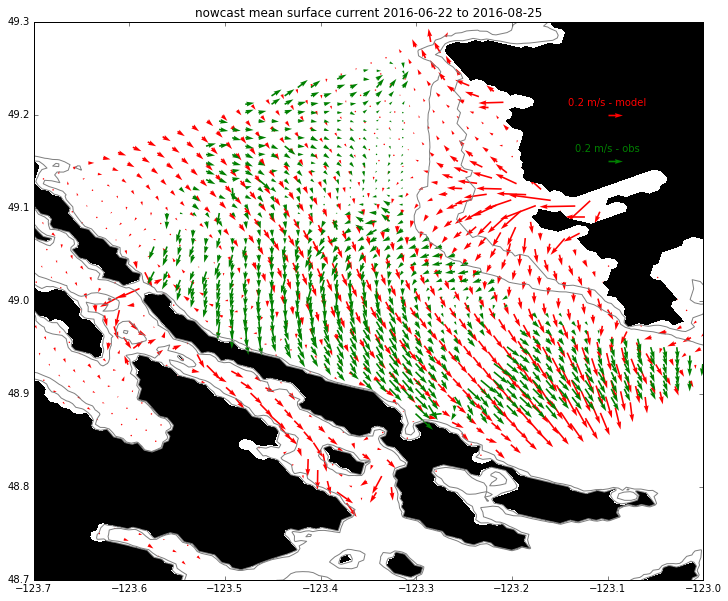

In [6]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
# plot model
st=3
scale=1
scale_unit='inches'
q=ax.quiver(lonssub[::st,::st], latssub[::st,::st], 
            uE.mean(axis=0)[0,::st,::st],vN.mean(axis=0)[0,::st,::st],
            color='r', scale=scale, scale_units=scale_unit)
viz_tools.plot_land_mask(ax,grid, coords='map')
viz_tools.plot_coastline(ax,grid,coords='map',isobath=5,color='gray')
viz_tools.plot_coastline(ax,grid,coords='map',isobath=20,color='gray')
ax.set_xlim([-123.7,-123])
ax.set_ylim([48.7,49.3])
ax.quiverkey(q,-123.1,49.2,.2, '0.2 m/s - model', coordinates='data',color='r',labelcolor='r')
ax.set_title('{} mean surface current {} to {}'.format('nowcast', 
                                                        to.strftime('%Y-%m-%d'),
                                                        tf.strftime('%Y-%m-%d')))
ax.get_xaxis().get_major_formatter().set_useOffset(False)
# plot obs
st=1
q=ax.quiver(lon_obs[::st], lat_obs[::st], 
            uobs[::st]/100, vobs[::st]/100,
            color='g',
            scale=scale, scale_units=scale_unit)
ax.quiverkey(q,-123.1,49.15,.2, '0.2 m/s - obs', coordinates='data',color='g',labelcolor='g')

In [7]:
fig.savefig('Mean_surface_current_nowcast.png', dpi=300,bbox_inches='tight')

# Nowcast-green

In [8]:
filesu = analyze.get_filenames(to, tf, '1d', 'grid_U', '/results/SalishSea/nowcast-green/')
filesv = analyze.get_filenames(to, tf, '1d', 'grid_V', '/results/SalishSea/nowcast-green/')

 # Load the files
u, time = analyze.combine_files(filesu, 'vozocrtx', [0], jss, iss)
v, time = analyze.combine_files(filesv, 'vomecrty', [0],  jss, iss)

uE, vN= research_VENUS.unstag_rot(u, v)

speed_nowcast_green = np.sqrt(uE**2 + vN**2).mean(axis=0)[0]

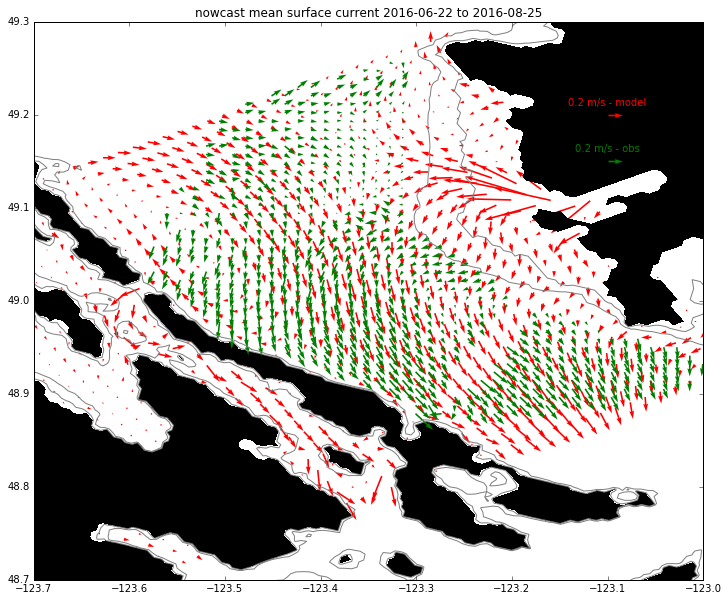

In [9]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
# plot model
st=3
scale=1
scale_unit='inches'
q=ax.quiver(lonssub[::st,::st], latssub[::st,::st], 
            uE.mean(axis=0)[0,::st,::st],vN.mean(axis=0)[0,::st,::st],
            color='r', scale=scale, scale_units=scale_unit)
viz_tools.plot_land_mask(ax,grid, coords='map')
viz_tools.plot_coastline(ax,grid,coords='map',isobath=5,color='gray')
viz_tools.plot_coastline(ax,grid,coords='map',isobath=20,color='gray')
ax.set_xlim([-123.7,-123])
ax.set_ylim([48.7,49.3])
ax.quiverkey(q,-123.1,49.2,.2, '0.2 m/s - model', coordinates='data',color='r',labelcolor='r')
ax.set_title('{} mean surface current {} to {}'.format('nowcast', 
                                                        to.strftime('%Y-%m-%d'),
                                                        tf.strftime('%Y-%m-%d')))
ax.get_xaxis().get_major_formatter().set_useOffset(False)
# plot obs
st=1
q=ax.quiver(lon_obs[::st], lat_obs[::st], 
            uobs[::st]/100, vobs[::st]/100,
            color='g',
            scale=scale, scale_units=scale_unit)
ax.quiverkey(q,-123.1,49.15,.2, '0.2 m/s - obs', coordinates='data',color='g',labelcolor='g')

In [10]:
fig.savefig('Mean_surface_current_nowcast-green.png', dpi=300,bbox_inches='tight')

# Current magnitude

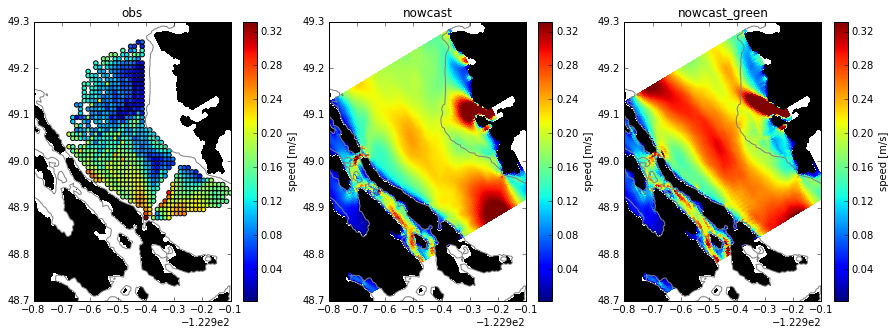

In [11]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
for ax, speed, title in zip(axs, [speed_obs, speed_nowcast, speed_nowcast_green],
                             ['obs','nowcast', 'nowcast_green']):
    if title =='obs':
        mesh = ax.scatter(lon_obs, lat_obs, c=speed)
    else:
        speed_plot = np.ma.array(speed,mask=1-tmask)
        mesh = ax.pcolormesh(lonssub, latssub, speed_plot, vmin=speed_obs.min(),vmax=speed_obs.max())
    cbar=plt.colorbar(mesh,ax=ax)
    ax.set_title(title)
    ax.set_xlim([-123.7,-123])
    ax.set_ylim([48.7,49.3])
    viz_tools.plot_land_mask(ax,grid,coords='map')
    cbar.set_label('speed [m/s]')
    viz_tools.plot_coastline(ax,grid,coords='map',isobath=20,color='gray')